# Assignment 8: Mathematical modelling - model estimation
## Preliminaries

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("possum.csv")

## Task 1: Robust regression ( / 20 pts)
### Question 1 ( / 13 pts)
Start with the function code that you wrote in homework 7. Modify the function simpleRegLossRSS to calculate the summed absolute deviation of the prediction from the data (instead of the residual sum-of-squares). Call this new function simpleRegLossSAD. Modify your simpleRegFit function (Task 3, Question 4) from Homework 7 to take a flexible loss function as a 3rd input argument. Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set (see HW7). Your function simpleRegFit  should provide a plot of the fit. Compare the fit with the fit you achieved with the squared error (HW7, task 3, question 5). What do you observe?

In [5]:
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x
    return yp 

def plotPrediction(b,x,y,predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predictFcn(b,xp)
    ax.plot(xp,yp,'r')

In [8]:
def simpleRegLossSAD(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    sad = sum(np.abs(res))
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (sad,deriv)

simpleRegLossSAD([83,2],df["age"],df["tailL"])

(165.9, array([-128.6,   54.2]))

      fun: 80.95652173913041
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 2.27373675e-13, -2.95330435e+02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 0
     njev: 94
   status: 2
  success: False
        x: array([36.3326087,  0.       ])
80.95652173913041


(0.8378927802650566, array([36.3326087,  0.       ]))

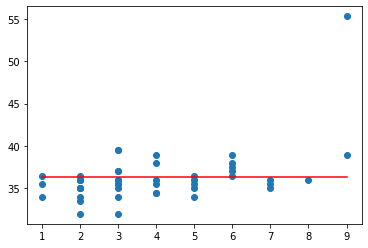

In [9]:
def simpleRegFit(x,y,fcn):
    b0=[np.mean(y),0]
    RES = so.minimize(fcn,b0,args=(x,y),jac=True)
    print(RES)
    b=RES.x # Results
    plotPrediction(b,x,y,simpleRegPredict)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = fcn(b,x,y)
    print(RSS)
    R2 = 1-RSS/TSS 
    return (R2,b)

simpleRegFit(df["age"],df["tailL"],simpleRegLossSAD)

### Question 2 ( / 7 pts)
Report the R2 for the fit using median regression (question 1). Compare it to the R2 value you got for the fit minimizing the squared error. Which one is lower? Why? Which fit is the better one? Which one will predict new data better?  

      fun: 80.95652173913041
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 2.27373675e-13, -2.95330435e+02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 106
      nit: 0
     njev: 94
   status: 2
  success: False
        x: array([36.3326087,  0.       ])
80.95652173913041
0.8378927802650566


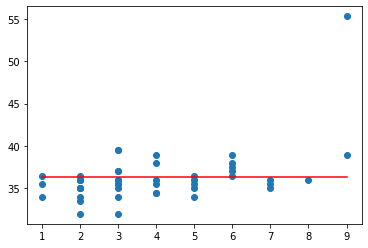

In [15]:
R2, b =simpleRegFit(df["age"],df["tailL"],simpleRegLossSAD)
print(R2)

the R2 is 0.837

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

In [19]:
D = pd.read_csv("fertilizer.csv")
D.head()

,Unnamed: 0,fertCon,harvest
0,0,0.488398,1.146285
1,1,2.994977,3.977302
2,2,3.475281,5.843234
3,3,0.818346,1.384137
4,4,3.786342,5.036091


<AxesSubplot:xlabel='fertCon', ylabel='harvest'>

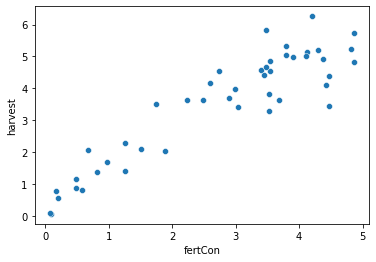

In [20]:
sns.scatterplot(x = "fertCon", y = "harvest", data = D)

I would describe this as a positive and solidly strong linear regression.

### Question 2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

array([ 35.        ,  20.67901235,   8.82716049,  -0.55555556,
        -7.4691358 , -11.91358025, -13.88888889, -13.39506173,
       -10.43209877,  -5.        ])

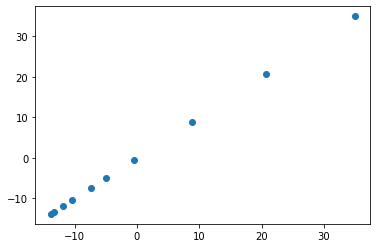

In [46]:
def polyRegPredict(b,x, order=1):
    """
    returns prediction of polynomal regression model on x
    len of b indicates order
    """
    yp=np.zeros(x.shape)
    for i in range(order):
        yp=yp+b[i]*(x**i)
        
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(yp, yp)
    return yp


polyRegPredict([-10,-4,1],np.linspace(-5,5,10), order=3)



### Question 3 ( / 18 pts)
Modify you function simpleRegLossRSS from HW7 to become function polyRegLossRSS, which calculates the residual sum of squares and the derivatives for the polyinomial regression. Also change your function plotPrediction to use polyRegPredict, instead of modelPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

In [47]:
def polyRegLossRSS(b,x,y):
    predY = polyRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    for i in range(len(b)):
        grad[i]=-2*np.sum((x**i)*res)
    return (rss,grad)

def polyRegFit(x,y,order=1,linestyle='r-',fig=True):
    b0=np.zeros((order+1,1))
    RES = so.minimize(polyRegLossRSS,b0,args=(x,y),jac=True,)
    b=RES.x # Results
    # b=polyRegressionFit(x,y,order) 
    if (fig):
        plotPrediction(b,x,y,polyRegPredict) 
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = polyRegLossRSS(b,x,y)
    R2 = 1-RSS/TSS 
#     print("R2 is {0:3.2f}".format(R2))
    return (R2,b)

polyRegFit("fertCon", "harvest", order = 1)

AttributeError: 'str' object has no attribute 'shape'

### Question 4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. What is the R2? 

## Task 3: Cross-validation of models ( / 40 pts)
### Question 1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. The sketch of the function can be found in the lecture. Call the function to get a cross-validated R2 for a polynomial fit of order 8. How much lower is the crossvalidated R2 than the fitted R2? 

In [48]:
def leaveOneOutCV(x,y,fitfcn,args = (),predfcn):
    N = x.shape
    print(N)
    yp=np.zeros(N)
    for i in range(N):
        ind = np.arrange(N)
        ind != i
        b=fitfcn(xtrain,ytrain,args)
        yp[ind]=predictfcn(b,x[ind])   
    rest = y-np.mean(y)
    TSS = sum(rest**2)
    yp = polyRegPredict(b,x)
    res = y-yp
    RSScv = sum(res**2)
    R2cv = 1-RSScv/TSS
    b=fitfcn(x,y,args)
    yf=predictfcn(b,x)
    rres = y-yf
    RSS = sum(rres**2)
    R2 = 1-RSS/TSS
    return R2cv, R2

R2cv, R2 = leaveOneOutCV(x,y,fitfcn,args = (),predfcn)
    

### Question 2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 